In [1]:
#Regularization
#read the file from GitHub
#import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

url = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'
df = pd.read_csv(url, index_col = 0).dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [2]:
#1.1 LASSO regression
#keep numeric predictors and omit categorical predictors
df_num = df.drop(['League', 'Division', 'NewLeague'], axis = 1)
df_num.head()
#handle missing data
#print(df_num['Salary'].mean())
#df_num_1 = df_num.fillna(df_num.mean()['Salary'])
#print(df_num_1.isnull().sum())
#df_num_1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


                   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
-Alan Ashby          315    81      7    24   38     39     14    3449    835   
-Alvin Davis         479   130     18    66   72     76      3    1624    457   
-Andre Dawson        496   141     20    65   78     37     11    5628   1575   
-Andres Galarraga    321    87     10    39   42     30      2     396    101   
-Alfredo Griffin     594   169      4    74   51     35     11    4408   1133   

                   CHmRun  CRuns  CRBI  CWalks  PutOuts  Assists  Errors  
-Alan Ashby            69    321   414     375      632       43      10  
-Alvin Davis           63    224   266     263      880       82      14  
-Andre Dawson         225    828   838     354      200       11       3  
-Andres Galarraga      12     48    46      33      805       40       4  
-Alfredo Griffin       19    501   336     194      282      421      25  


-Alan Ashby          475.0
-Alvin Davis         480.0
-Andre 

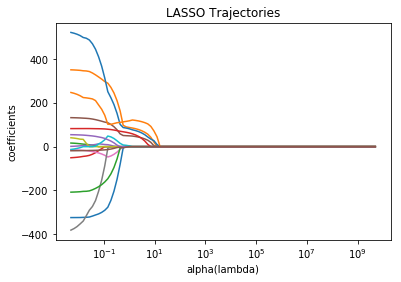

2.24102067695
111160.393671
AtBat      0.000000
Hits       0.951516
HmRun      0.000000
Runs       0.000000
RBI        0.402763
Walks      2.774631
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.268635
CRuns      0.000000
CRBI       0.492185
CWalks     0.000000
PutOuts    0.394770
Assists    0.000000
Errors    -0.000000
dtype: float64


In [3]:
#split the data into training and test sets
x = df_num.drop('Salary', axis = 1)
y = df_num.Salary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 1) #changing test size changes results
print(x.head())
print('\n')
print(y.head())

#set an array of alpha values to try
alphas = 10**np.linspace(10, -2, 100)*0.5
#print(alphas)

#a visualization of the coefficient trajectories
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(scale(x), y)
    coefs.append(lasso.coef_)
#print(np.shape(coefs))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha(lambda)')
plt.ylabel('coefficients')
plt.axis('tight')
plt.title("LASSO Trajectories")
plt.show()

#perform 10-fold CV to find the optimal value of the regularization penalty
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lasso_cv.fit(x_train, y_train)
print(lasso_cv.alpha_)

#use the best value of alpha to perform LASSO
lasso_opt = Lasso(max_iter=10000, normalize=True)
lasso_opt.set_params(alpha = lasso_cv.alpha_)
lasso_opt.fit(x_train, y_train)
print(mean_squared_error(y_test, lasso_opt.predict(x_test)))

#finally, fit the model on the entire data set
print(pd.Series(lasso_opt.coef_, index = x.columns))

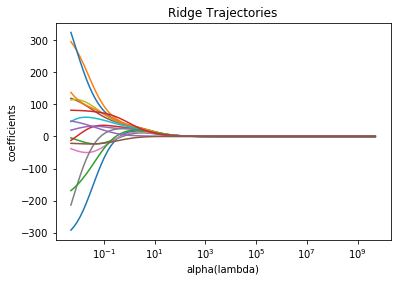

0.574878497699
104628.728332
AtBat     -0.033776
Hits       0.828731
HmRun     -0.227147
Runs       0.696582
RBI        1.463143
Walks      2.001124
Years      0.686783
CAtBat     0.006619
CHits      0.051711
CHmRun     0.505347
CRuns      0.107236
CRBI       0.126384
CWalks     0.101977
PutOuts    0.297540
Assists    0.010178
Errors     0.220376
dtype: float64


In [4]:
#1.2 Ridge regression
#a visualization of the coefficient trajectories
ridge = Ridge(normalize = True)
coeffs = []
for alpha in alphas:
    ridge.set_params(alpha = alpha)
    ridge.fit(scale(x), y)
    coeffs.append(ridge.coef_)
#print(np.shape(coeffs))
ax = plt.gca()
ax.plot(alphas, coeffs)
ax.set_xscale('log')
plt.xlabel('alpha(lambda)')
plt.ylabel('coefficients')
plt.axis('tight')
plt.title("Ridge Trajectories")
plt.show()

#perform cv to find the optimal value of the regularization penalty
ridge_cv = RidgeCV(alphas = alphas, normalize = True)
ridge_cv.fit(x_train, y_train)
print(ridge_cv.alpha_)

#use the best value of alpha to perform Ridge
ridge_opt = Ridge(alpha = ridge_cv.alpha_, normalize = True)
ridge_opt.fit(x_train, y_train)
print(mean_squared_error(y_test, ridge_opt.predict(x_test)))

#finally, fit the model on the entire data set
print(pd.Series(ridge_opt.coef_, index = x.columns))

In [5]:
##1.1.1
#Graph is showed above.

##1.1.2
#The final three predictors that remain in the model are Walks, Hits, and CRBI. 

##1.1.3
#The optimal value of the regularization penalty is 2.24102067695.

##1.1.4
#Six predictors are left in that model.

##1.2.1
#Graph is showed above.

##1.2.2
#The optimal value of the regularization penalty is 0.574878497699. 

In [6]:
###Short Answer

##2.1
#Bias is the difference between the expected model prediction and the correct value. 
#Variance is the variability of model prediction for a data point and it shows us spread of the data.
#Models with a lower bias have a higher variance, and vice versa. 
#High bias can cause underfitting.
#High variance can cause overfitting.
#When model includes more terms, coefficient estimates suﬀer from high variance. 

##2.2
#We can regularize the coefficients(regularization) to control variance. We can decrease the variance to increase the bias, and 
#vice versa. We use the shrinkage parameter, alpha to control the size of the coefficients. 

##2.3
#In number(1), we use alpha(shrinkage parameter) to control amount of regularization. 
#When alpha goes to 0, we get the least squares solutions. When alpha goes to infinity, we get intercept-only model.
#Increasing the value of alpha will add more penalties to the model, decrease the variance, and increase the bias.
#Decreasing the value of alpha will add less penalties to the model, increase the variance, and decrease the bias.
#From the graphs above, we can see that models including more features when alpha is smaller but the coefficients vary largely. 
#These models have high variance but low bias.
#From the graphs above, we can see that models including less features when alpha is bigger but the coefficients don't vary a lot. 
#These models have low variance but high bias.